In [ ]:
pwd

'/content'

In [ ]:
cd './drive/My Drive/Intel_Dataset'

/content/drive/My Drive/Intel_Dataset


In [ ]:
ls

seg_pred/  seg_test/  seg_train/


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as activations
from tensorflow.keras.optimizers import SGD

import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.metrics as metrics
import tensorflow.keras.utils as utils
import tensorflow.keras.losses as losses
from keras.utils.vis_utils import model_to_dot
import os
import pathlib

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [ ]:
train_dir = pathlib.Path('./seg_train/seg_train')
test_dir = pathlib.Path('./seg_test/seg_test')

In [ ]:
train_img_count = len(list(train_dir.glob("*/*.jpg")))

print("No of train images: ", train_img_count)

No of train images:  14034


In [ ]:
test_img_count = len(list(test_dir.glob("*/*.jpg")))

print("No of test images: ", test_img_count)

No of test images:  3000


In [ ]:
labels = np.array([item.name for item in train_dir.glob('*')])

print("The labels are : ", labels)

print("The dimension is: ", labels.shape)

The labels are :  ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
The dimension is:  (6,)


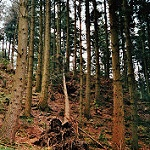

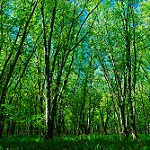

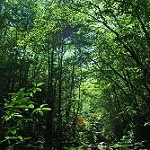

In [ ]:
from IPython.display import Image, display

forest = list(train_dir.glob('forest/*'))

for image_path in forest[:3]:
    display(Image(str(image_path)))

In [ ]:
building = list(train_dir.glob('buildings/*'))
glacier = list(train_dir.glob('glacier/*'))
mountain = list(train_dir.glob('mountain/*'))
sea = list(train_dir.glob('sea/*'))
street = list(train_dir.glob('street/*'))

In [ ]:

print("****------ TRAIN FOLDER IMAGES ------****") 
print("# of buildings images\t", len(building))
print("# of forest images\t", len(forest))
print("# of glacier  images\t", len(glacier))
print("# of mountain images\t", len(mountain))
print("# of sea images\t\t", len(sea))
print("# of street images\t", len(street))

****------ TRAIN FOLDER IMAGES ------****
# of buildings images	 2191
# of forest images	 2271
# of glacier  images	 2404
# of mountain images	 2512
# of sea images		 2274
# of street images	 2382


In [ ]:
img_size = 150
batch = 64

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)     #Splitting training set to validation set and training data with 0.2 proportion

#Training set
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch, 
    shuffle=True,
    subset='training')

#Validation set
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch, 
    subset='validation')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [ ]:
#Dividing data to batches. (batch size=64)
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (64, 150, 150, 3)
Label batch shape:  (64, 6)


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=None)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch, 
    shuffle=True)

Found 3000 images belonging to 6 classes.


In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(labels[label_batch[n]==1][0])
      plt.axis('off')

In [ ]:
print(label_batch_train)

[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0.

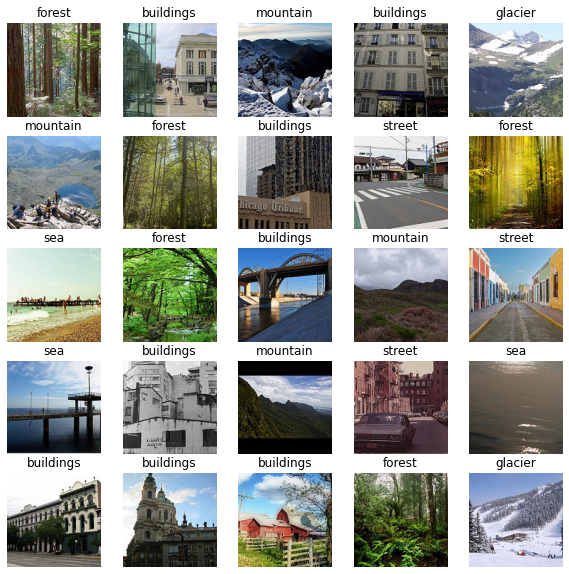

In [ ]:
show_batch(image_batch_train, label_batch_train)

In [ ]:
train_generator.num_classes

6

In [ ]:

numclasses=train_generator.num_classes

def build_model0():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  #model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(numclasses, activation='softmax'))

  loss = losses.categorical_crossentropy #losses.sparse_categorical_crossentropy
  #one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1] But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]
  optimizer = optimizers.Adam(lr=0.001) #optimizers.RMSprop(lr=1e-4)#optimizers.SGD(lr=0.001) #Adam(lr=0.001)
  model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['acc'])

  return model

In [ ]:
model0=build_model0()
model0.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 36992)            

In [ ]:
EPOCHS = 10
Model_1 = model0.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=val_generator)

Epoch 1/10
176/176 [==============================] - 27s 155ms/step - loss: 1.2397 - acc: 0.5011 - val_loss: 0.9289 - val_acc: 0.6330
Epoch 2/10
176/176 [==============================] - 27s 155ms/step - loss: 0.9684 - acc: 0.6211 - val_loss: 0.8243 - val_acc: 0.7297
Epoch 3/10
176/176 [==============================] - 27s 155ms/step - loss: 0.8432 - acc: 0.6814 - val_loss: 0.7264 - val_acc: 0.7233
Epoch 4/10
176/176 [==============================] - 27s 152ms/step - loss: 0.7419 - acc: 0.7280 - val_loss: 0.5962 - val_acc: 0.7971
Epoch 5/10
176/176 [==============================] - 27s 153ms/step - loss: 0.6551 - acc: 0.7570 - val_loss: 0.5452 - val_acc: 0.8124
Epoch 6/10
176/176 [==============================] - 27s 151ms/step - loss: 0.5789 - acc: 0.7890 - val_loss: 0.5236 - val_acc: 0.8224
Epoch 7/10
176/176 [==============================] - 27s 156ms/step - loss: 0.5354 - acc: 0.8065 - val_loss: 0.5330 - val_acc: 0.8238
Epoch 8/10
176/176 [==============================] - 2

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
print(steps_per_epoch)

176.0


In [ ]:
def plot_history(Model, metric, val_metric,EPOCHS):
  acc = Model.history[metric]
  val_acc = Model.history[val_metric]

  loss=Model.history['loss']
  val_loss=Model.history['val_loss']

  epochs_range = range(EPOCHS)

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  #fig.savefig('traininghistory.pdf')

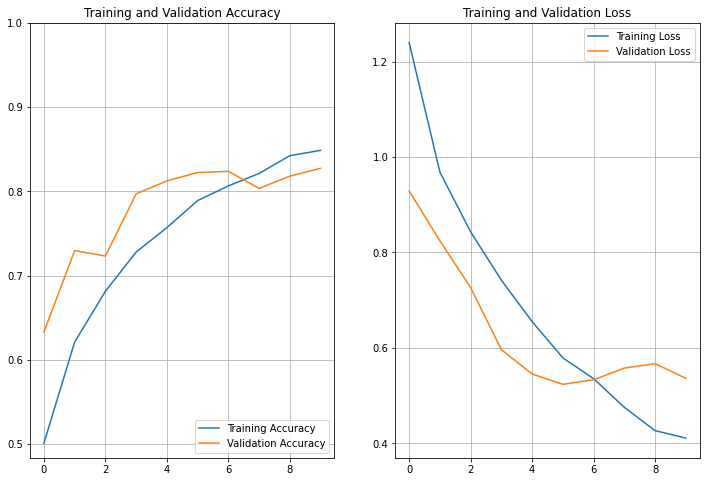

In [ ]:
Model= Model_1
plot_history(Model,'acc','val_acc',EPOCHS)

# Pre-trained


In [ ]:
IMG_SHAPE = (img_size, img_size, 3)

# Create the base model from the pre-trained model MobileNet V2

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [ ]:
base_model.trainable = False #freeze the convolutional base created from the previous step and use that as a feature extractor,

In [ ]:
model = tf.keras.Sequential([
  base_model,
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(numclasses, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 5, 1280)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
epochs = 10

pre_trained = model.fit(train_generator, 
                        epochs=EPOCHS, 
                        validation_data=val_generator)

Epoch 1/10
176/176 [==============================] - 29s 162ms/step - loss: 0.4980 - accuracy: 0.8215 - val_loss: 0.3083 - val_accuracy: 0.8877
Epoch 2/10
176/176 [==============================] - 27s 156ms/step - loss: 0.2932 - accuracy: 0.8907 - val_loss: 0.2881 - val_accuracy: 0.8919
Epoch 3/10
176/176 [==============================] - 27s 156ms/step - loss: 0.2660 - accuracy: 0.9043 - val_loss: 0.2703 - val_accuracy: 0.9012
Epoch 4/10
176/176 [==============================] - 28s 157ms/step - loss: 0.2421 - accuracy: 0.9135 - val_loss: 0.2680 - val_accuracy: 0.9066
Epoch 5/10
176/176 [==============================] - 27s 153ms/step - loss: 0.2295 - accuracy: 0.9175 - val_loss: 0.2669 - val_accuracy: 0.9012
Epoch 6/10
176/176 [==============================] - 27s 155ms/step - loss: 0.2194 - accuracy: 0.9218 - val_loss: 0.2754 - val_accuracy: 0.8980
Epoch 7/10
176/176 [==============================] - 27s 154ms/step - loss: 0.2065 - accuracy: 0.9261 - val_loss: 0.2779 - val_ac

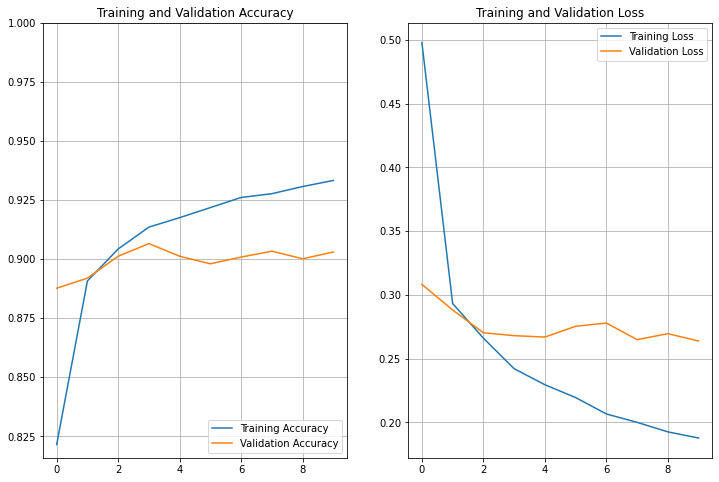

In [ ]:
his2= pre_trained
plot_history(his2,'accuracy','val_accuracy',epochs)